In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df = pd.read_pickle('data/cleaned_data.pkl')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

<Axes: title={'center': 'Correlation Of Features With Target Variable'}>

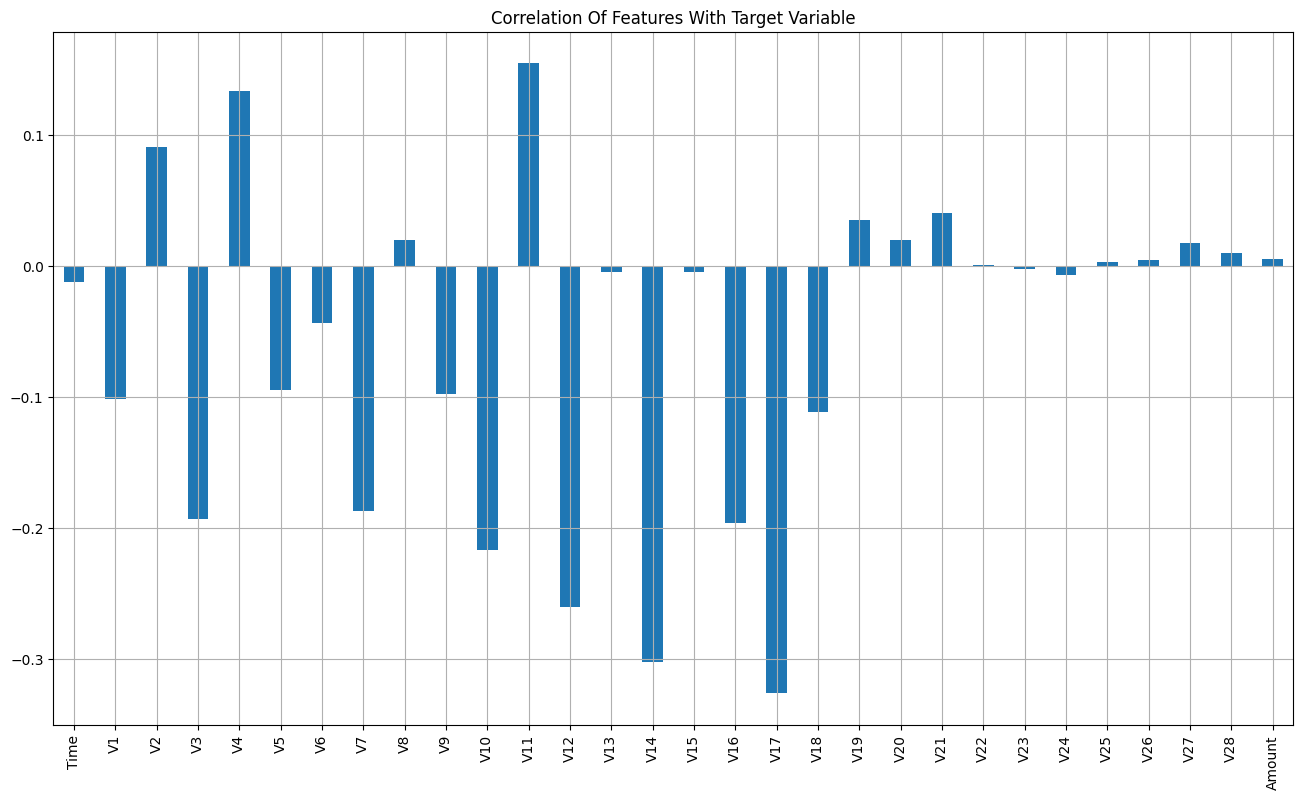

In [5]:
# Calculate the correlation coefficients between the 'Class' column and the first 30 columns 
x = df.corr()['Class'][:30]

# Create a bar plot to visualize the correlation of features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Correlation Of Features With Target Variable", grid=True)

In [6]:
x = df.corr()['Class'][:30]
max_corr = abs(x).max()
threshold = max_corr *0.10

x_df = df.corr()['Class'][:30][abs(df.corr()['Class'][:30]) > threshold]

In [7]:
x_df.index

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21'],
      dtype='object')

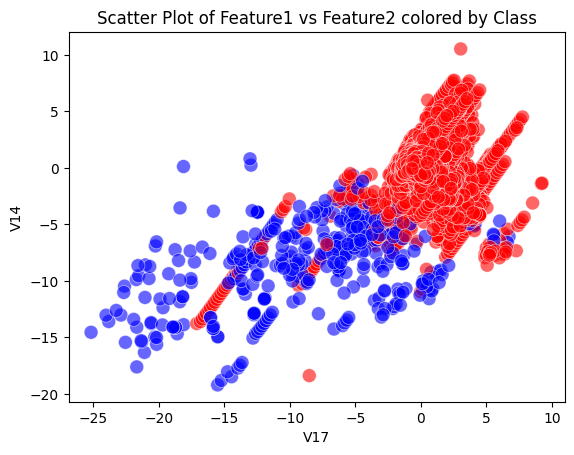

In [8]:
## Scatter plot with 2 most correlated features and output classes
colormap = {0: 'red', 1: 'blue'}

# Map the colors to the Class column
colors = df['Class'].map(colormap)

# Create the scatter plot
plt.scatter(df['V17'], df['V14'], c=colors, s=100, alpha=0.6, edgecolors='w', linewidth=0.5)

# Add labels and title
plt.xlabel('V17')
plt.ylabel('V14')
plt.title('Scatter Plot of Feature1 vs Feature2 colored by Class')

# Display the plot
plt.show()


In [9]:
# Create a copy of the DataFrame df
df2 = df.copy()

from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features (X) and target (y)
X = df2.drop('Class', axis=1)
X = X.loc[:, x_df.index]
y = df2['Class']

print('Original dataset shape %s' % Counter(y))

# Assuming X and y are your features and target variables
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_resampled))

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)


Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [10]:
X_train.shape

(454904, 17)

In [11]:
df_sampled = pd.concat([X_train, y_train], axis=1)

In [12]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, confusion_matrix

In [17]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    ## Calculate Accuracy
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    ## Calculate F1-score
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 
    ## Calculate Precision
    model_train_precision = precision_score(y_train, y_train_pred) 
    ## Calculate Recall
    model_train_recall = recall_score(y_train, y_train_pred) 
    ## Calculate ROC
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    # Calculate CF
    model_train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
    # evaluate_model(model, y_train, y_train_pred)


    # evaluate_model(model, y_test, y_test_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
    model_test_confusion_matrix = confusion_matrix(y_test, y_test_pred) # calculate CM

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {}".format(round(model_train_accuracy*100 ,2)))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    print(model_train_confusion_matrix)
    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {}'.format(round(model_test_accuracy*100,2)))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    print(model_test_confusion_matrix)

    print('\n')
    print('='*35)
    

Logisitic Regression
Model performance for Training set
- Accuracy: 93.72
- F1 score: 0.9371
- Precision: 0.9728
- Recall: 0.8996
- Roc Auc Score: 0.9372
[[221792   5714]
 [ 22842 204556]]
----------------------------------
Model performance for Test set
- Accuracy: 93.75
- F1 score: 0.9374
- Precision: 0.9734
- Recall: 0.8997
- Roc Auc Score: 0.9376
[[55412  1397]
 [ 5709 51208]]


Decision Tree
Model performance for Training set
- Accuracy: 100.0
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
[[227506      0]
 [     0 227398]]
----------------------------------
Model performance for Test set
- Accuracy: 99.83
- F1 score: 0.9983
- Precision: 0.9977
- Recall: 0.9988
- Roc Auc Score: 0.9983
[[56678   131]
 [   66 56851]]


Random Forest
Model performance for Training set
- Accuracy: 100.0
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
[[227506      0]
 [     0 227398]]
----------------------------------
Model performance 

/Users/karankaran/Desktop/Github_Karan/CreditCard_FraudDetection/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost
Model performance for Training set
- Accuracy: 95.6
- F1 score: 0.9560
- Precision: 0.9727
- Recall: 0.9383
- Roc Auc Score: 0.9560
[[221518   5988]
 [ 14020 213378]]
----------------------------------
Model performance for Test set
- Accuracy: 95.61
- F1 score: 0.9561
- Precision: 0.9726
- Recall: 0.9387
- Roc Auc Score: 0.9561
[[55304  1505]
 [ 3490 53427]]


Xgboost
Model performance for Training set
- Accuracy: 99.98
- F1 score: 0.9998
- Precision: 0.9996
- Recall: 1.0000
- Roc Auc Score: 0.9998
[[227407     99]
 [     0 227398]]
----------------------------------
Model performance for Test set
- Accuracy: 99.93
- F1 score: 0.9993
- Precision: 0.9987
- Recall: 1.0000
- Roc Auc Score: 0.9993
[[56734    75]
 [    0 56917]]




## Best Model

In [18]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)

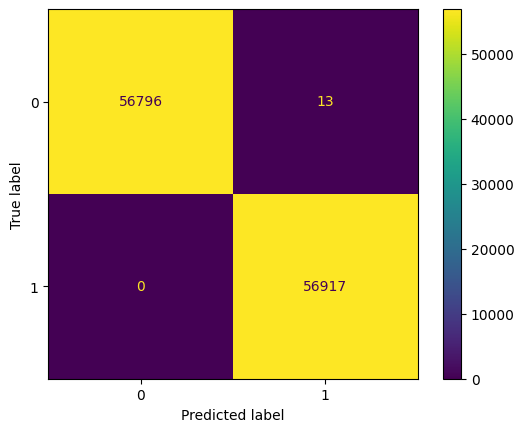

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)